**Top 500 criptomonedas**

A continuación realizamos un top 500 de criptomonedas utilizando la API proporcionada por CoinMarketCap. El top 500 está evaluado en base a la capitalización de mercado de cada criptomoneda.

In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np
import sklearn as sc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import requests
import time
from googleapiclient.discovery import build
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [2]:
api_key = '71f1e468-c082-434d-8889-101e33fd8f06'

In [3]:
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key
}


In [4]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'


In [5]:
params = {
  'start': '1',
  'limit': '500',
  'convert': 'USD'
}


In [6]:
response = requests.get(url, headers=headers, params=params)


In [73]:
data = json.loads(response.text)


In [75]:
crypto_list = []
for crypto in data['data']:
    name = crypto['name']
    symbol = crypto['symbol']
    price = crypto['quote']['USD']['price']
    circulating_supply = crypto['circulating_supply']
    max_supply = crypto['max_supply']
    self_reported_circulating_supply = crypto['self_reported_circulating_supply']
    crypto_list.append([name, symbol, price,circulating_supply,max_supply,self_reported_circulating_supply])

df0 = pd.DataFrame(crypto_list, columns=['Name', 'Symbol', 'Price', 'circulating_supply','max_supply','self_reported_circulating_supply'])


**Datos del dataframe**

"Name": Nombre de la criptomoneda.

"Symbol": Las siglas que representan la criptomoneda.

"Price": Su precio al momento de tomar los datos.

"Circulating_supply": Suministro en circulación, la cantidad de activos en circulación.

"Max_supply": Cantidad máxima de suministro, la cantidad máxima del activo que puede estar en circulación. En caso de que esté representado como "NaN" significa que no tiene un suministro máximo.

"Self_reported_circulating_supply": Suministro en circulación declarado por la institución que regula el activo. En caso de que esté representado como "NaN" significa que no está controlado por ninguna institución o no fue declarada la cantidad.

In [76]:
df0

,Name,Symbol,Price,circulating_supply,max_supply,self_reported_circulating_supply
0,Bitcoin,BTC,28301.898344,1.932639e+07,2.100000e+07,NaN
1,Ethereum,ETH,1818.247976,1.223739e+08,NaN,NaN
2,Tether,USDT,1.000797,7.848610e+10,NaN,NaN
3,BNB,BNB,329.003272,1.578902e+08,NaN,NaN
4,USD Coin,USDC,0.998954,3.443711e+10,NaN,NaN
5,XRP,XRP,0.440910,5.095091e+10,1.000000e+11,NaN
6,Cardano,ADA,0.369708,3.471953e+10,4.500000e+10,NaN
7,Dogecoin,DOGE,0.077265,1.326708e+11,NaN,NaN
8,Polygon,MATIC,1.139541,8.734317e+09,1.000000e+10,NaN
9,Solana,SOL,22.212118,3.837790e+08,NaN,NaN


**Data histórica de Bitcoin**

Utlizamos la API proporcionada por CryptoCompare para hacer un dataframe que contenga data histórica de Bitcoin, desde 2017 hasta 2023.

In [10]:
import requests
import pandas as pd

api_key = "e9e611db5483f01736b5c5a1690c4b341bb73365bc97be2d3e16cec32d87530a"

url = "https://min-api.cryptocompare.com/data/v2/histoday"

params = {
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000, 
    "api_key": api_key
}

response = requests.get(url, params=params)

data = response.json()["Data"]["Data"]

df1 = pd.DataFrame(data, columns=["time", "open", "high", "low", "close", "volume"])

df1["time"] = pd.to_datetime(df1["time"], unit="s")
df1.set_index("time", inplace=True)

print(df1.head())

               open     high      low    close  volume
time                                                  
2017-10-01  4360.62  4412.62  4258.32  4403.09     NaN
2017-10-02  4403.09  4477.38  4364.67  4401.32     NaN
2017-10-03  4401.32  4435.99  4230.73  4314.18     NaN
2017-10-04  4314.18  4355.29  4183.57  4218.66     NaN
2017-10-05  4218.66  4365.76  4143.35  4321.44     NaN


**Datos del datframe**

"time": fecha a la que corresponde los datos.

"Open": Precio de apertura.

"High": Precio máximo al que llegó el activo en ese día.

"Low": Precio mínimo al que llegó el activo en ese día.

"Close": Preció en el que cerró el activo ese día.

"Volume": Cantidad negociada del activo en ese caso.

In [11]:
df1

,open,high,low,close,volume
time,,,,,
2017-10-01,4360.62,4412.62,4258.32,4403.09,NaN
2017-10-02,4403.09,4477.38,4364.67,4401.32,NaN
2017-10-03,4401.32,4435.99,4230.73,4314.18,NaN
2017-10-04,4314.18,4355.29,4183.57,4218.66,NaN
2017-10-05,4218.66,4365.76,4143.35,4321.44,NaN
...,...,...,...,...,...
2023-03-20,28037.32,28534.79,27229.43,27807.29,NaN
2023-03-21,27807.29,28498.09,27411.61,28185.99,NaN
2023-03-22,28185.99,28877.16,26681.65,27317.37,NaN


**Tipos de cambio de un registro histórico de monedas de los intervalos de tiempo(hrs,min,sec).**

El tipo de cambio se define como (VWAP-24H) las últimas 24 horas (ventana móvil en el tiempo).

Los tipos de cambio se generan a partir de conjuntos de datos de cotizaciones, transacciones y metadatos.

Se extrae una una lista completa de los tipos de cambio históricos de cualquier activos, agrupados en períodos de tiempo.


Conexion a la api:

https://www.coinapi.io/
https://docs.coinapi.io/market-data/rest-api/exchange-rates

Se obtiene el tipo de cambio entre un par de activos solicitados.
Tenemos una BD de 3965 registros

In [12]:
url = 'https://rest.coinapi.io/v1/exchangerate/BTC?invert=false'

payload = {}
headers= {'X-CoinAPI-Key' : '11FFD66F-7A70-4195-B61B-400822103829'}

response = requests.request("GET", url, headers=headers, data = payload)


json_data_exchange = json.loads(response.text.encode('utf8'))

In [13]:
print(json_data_exchange)

{'asset_id_base': 'BTC', 'rates': [{'time': '2023-03-24T01:50:06.0000000Z', 'asset_id_quote': '1000SHIB', 'rate': 2804625.470612083}, {'time': '2023-03-24T01:50:06.0000000Z', 'asset_id_quote': '1EARTH', 'rate': 10076362.01746146}, {'time': '2023-03-24T01:50:06.0000000Z', 'asset_id_quote': '1ECO', 'rate': 63630.78660504105}, {'time': '2023-03-24T01:50:06.0000000Z', 'asset_id_quote': '1INCH', 'rate': 54338.71120459403}, {'time': '2023-03-24T01:50:06.0000000Z', 'asset_id_quote': '1INCH3L', 'rate': 49313.751524178886}, {'time': '2023-03-24T01:50:06.0000000Z', 'asset_id_quote': '1INCH3S', 'rate': 81969.4380461544}, {'time': '2023-03-24T01:50:06.0000000Z', 'asset_id_quote': '1INCH5L', 'rate': 149331.29500186024}, {'time': '2023-03-24T01:50:06.0000000Z', 'asset_id_quote': '1INCH5S', 'rate': 146574.89666763434}, {'time': '2023-03-24T01:50:06.0000000Z', 'asset_id_quote': '1PECO', 'rate': 316780.73290925764}, {'time': '2023-03-24T01:50:06.0000000Z', 'asset_id_quote': '1SOL', 'rate': 4476117.9199

**Variable de la Data de Tipos de Cambio**

**time** Tiempo en ISO 8601 de los datos de mercado utilizados para calcular los tipos de cambio.

**asset_id_base**	Identificador del activo base de tipo de cambio solicitado.

**asset_id_quote**	Identificador del activo de cotización de tipo de cambio solicitado.

**rate**	Tipo de cambio entre activos.

{
    "time": "2017-08-09T14:31:18.3150000Z",
     "asset_id_base": "BTC",
     "asset_id_quote": "USD",
    "rate": 3260.3514321215056208129867667
}

**Guardando el json data en un dataframe**

In [14]:
dfexchange = pd.DataFrame(json_data_exchange)
dfexchange.to_csv('bitcoinexchange-data.csv', index=False)

In [15]:
print(dfexchange.sample)

<bound method NDFrame.sample of      asset_id_base                                              rates
0              BTC  {'time': '2023-03-24T01:50:06.0000000Z', 'asse...
1              BTC  {'time': '2023-03-24T01:50:06.0000000Z', 'asse...
2              BTC  {'time': '2023-03-24T01:50:06.0000000Z', 'asse...
3              BTC  {'time': '2023-03-24T01:50:06.0000000Z', 'asse...
4              BTC  {'time': '2023-03-24T01:50:06.0000000Z', 'asse...
...            ...                                                ...
4084           BTC  {'time': '2023-03-23T01:54:35.0000000Z', 'asse...
4085           BTC  {'time': '2023-03-23T01:54:33.0000000Z', 'asse...
4086           BTC  {'time': '2023-03-23T01:52:16.0000000Z', 'asse...
4087           BTC  {'time': '2023-03-23T01:52:16.0000000Z', 'asse...
4088           BTC  {'time': '2023-03-23T01:52:15.0000000Z', 'asse...

[4089 rows x 2 columns]>


**Conclusion**

Podemos utilizar este dataframe para hacer trading con los datos proporcionados tales como, la cotización, transacciones y metadata.

En el siguiente analisis vamos a explorar diferentes datos extraidos de Coinmarketcap.com

La API de CoinMarketCap proporciona una gran cantidad de datos relacionados con criptomonedas. Algunos ejemplos de datos que puedes extraer de la misma página son:

1-Una lista de las 100 criptomonedas con mayor capitalización de mercado

2-La variación porcentual del precio de una criptomoneda en las últimas 24 horas

3-El volumen de operaciones de una criptomoneda en las últimas 24 horas

4-La capitalización de mercado de una criptomoneda

5-La lista de las criptomonedas más populares en el momento

In [16]:
url_base = 'https://pro-api.coinmarketcap.com/v1/'

1-Una lista de las 100 criptomonedas con mayor capitalización de mercado
La capitalización de mercado de una criptomoneda es el valor total de la criptomoneda en el mercado. Se calcula multiplicando el precio actual de la criptomoneda por la cantidad total de monedas en circulación. Por lo tanto, la lista de las 100 criptomonedas con mayor capitalización de mercado mostrará las 100 criptomonedas que tienen el mayor valor en el mercado en un momento determinado.

In [17]:
headers = {'X-CMC_PRO_API_KEY': '7b29bcd5-778c-4d90-8887-40eea96042b2'}
params = {'start': '1', 'limit': '100', 'convert': 'USD'}

response = requests.get(url_base + 'cryptocurrency/listings/latest',
                        headers=headers,
                        params=params)

print(response.text)

import json

data = json.loads(response.text)

{"status":{"timestamp":"2023-03-24T01:50:28.351Z","error_code":0,"error_message":null,"elapsed":18,"credit_count":1,"notice":null,"total_count":9094},"data":[{"id":1,"name":"Bitcoin","symbol":"BTC","slug":"bitcoin","num_market_pairs":10105,"date_added":"2013-04-28T00:00:00.000Z","tags":["mineable","pow","sha-256","store-of-value","state-channel","coinbase-ventures-portfolio","three-arrows-capital-portfolio","polychain-capital-portfolio","binance-labs-portfolio","blockchain-capital-portfolio","boostvc-portfolio","cms-holdings-portfolio","dcg-portfolio","dragonfly-capital-portfolio","electric-capital-portfolio","fabric-ventures-portfolio","framework-ventures-portfolio","galaxy-digital-portfolio","huobi-capital-portfolio","alameda-research-portfolio","a16z-portfolio","1confirmation-portfolio","winklevoss-capital-portfolio","usv-portfolio","placeholder-ventures-portfolio","pantera-capital-portfolio","multicoin-capital-portfolio","paradigm-portfolio","btc-ecosystem"],"max_supply":21000000,"

In [18]:
# Seleccionar los datos de interés
datos = data['data']
monedas = []
for moneda in datos:
    monedas.append({
        'Nombre': moneda['name'],
        'Símbolo': moneda['symbol'],
        'Precio USD': moneda['quote']['USD']['price'],
        'Capitalización de mercado': moneda['quote']['USD']['market_cap'],
        'Volumen 24h': moneda['quote']['USD']['volume_24h']
    })

# Almacenar los datos en un DataFrame
df2 = pd.DataFrame(monedas)
print(df)

                  Name Symbol         Price  circulating_supply    max_supply  \
0              Bitcoin    BTC  28333.095963        1.932639e+07  2.100000e+07   
1             Ethereum    ETH   1818.806421        1.223739e+08           NaN   
2               Tether   USDT      1.000877        7.848610e+10           NaN   
3                  BNB    BNB    329.273417        1.578902e+08           NaN   
4             USD Coin   USDC      0.999074        3.443711e+10           NaN   
..                 ...    ...           ...                 ...           ...   
495              NuNet    NTX      0.066679        5.040847e+08  1.000000e+09   
496  Alpha Quark Token    AQT      1.260971        2.664078e+07  3.000000e+07   
497          Hourglass   WAIT      0.342380        9.795972e+07  1.000000e+08   
498           Syntropy   NOIA      0.050805        6.598909e+08  1.000000e+09   
499           Adshares    ADS      0.889900        3.761944e+07  3.875821e+07   

     self_reported_circulat

2-La variación porcentual del precio de una criptomoneda en las últimas 24 horas La variación porcentual del precio de una criptomoneda en las últimas 24 horas es el cambio porcentual en el precio de la criptomoneda durante las últimas 24 horas. Este cálculo se realiza comparando el precio actual de la criptomoneda con el precio de hace 24 horas. Por lo tanto, la variación porcentual del precio es una medida de la tasa de crecimiento o caída del precio de la criptomoneda en un período de 24 horas.

In [24]:
# Configurar los parámetros de la solicitud
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7b29bcd5-778c-4d90-8887-40eea96042b2'
}
params = {
    'id': '1',  # ID de Bitcoin en CoinMarketCap
    'convert': 'USD'  # Convertir a USD
}

# Hacer la solicitud
response = requests.get(url, headers=headers, params=params)

# Extraer la variación porcentual del precio en las últimas 24 horas
data = response.json()
percent_change_24h = data['data']['1']['quote']['USD']['percent_change_24h']

# Imprimir el resultado
print(f"Variación porcentual del precio de Bitcoin en las últimas 24 horas: {percent_change_24h}%")

Variación porcentual del precio de Bitcoin en las últimas 24 horas: 4.09384014%


Como investigacion, podriamos solicitar la variacion del precio del bitcoin en un bucle que se repita una vez por hora para almacenar esa informacion y representarla en un cuadro

In [ ]:
# Configurar los parámetros de la solicitud
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7b29bcd5-778c-4d90-8887-40eea96042b2'
}
params = {
    'id': '1',  # ID de Bitcoin en CoinMarketCap
    'convert': 'USD'  # Convertir a USD
}

# Almacenar los datos de variación porcentual en una lista
percent_changes = []

# Realizar una solicitud cada hora durante 24 horas
for i in range(24):
    # Hacer la solicitud
    response = requests.get(url, headers=headers, params=params)
    
    # Extraer la variación porcentual del precio en las últimas 24 horas
    data = response.json()
    percent_change_24h = data['data']['1']['quote']['USD']['percent_change_24h']
    
    # Agregar la variación porcentual a la lista
    percent_changes.append(percent_change_24h)
    
    # Esperar una hora antes de hacer la siguiente solicitud
    time.sleep(3600)

# Crear un gráfico de la evolución de la variación porcentual a lo largo del tiempo
sns.lineplot(x=range(24), y=percent_changes)
plt.xlabel('Hora')
plt.ylabel('Variación porcentual del precio de Bitcoin en las últimas 24 horas')
plt.show()


Este codigo no esta probado porque su ejecucion requiere 24 horas en completarse. Se envia la request para obtener el valor de la criptomoneda cada una hora. 

3-El volumen de operaciones de una criptomoneda en las últimas 24 horas
El volumen de operaciones de una criptomoneda es la cantidad total de la criptomoneda que ha sido comprada y vendida durante un período de tiempo determinado. El volumen de operaciones en las últimas 24 horas es la cantidad total de la criptomoneda que ha sido comprada y vendida durante las últimas 24 horas. El volumen de operaciones es una medida de la actividad comercial de la criptomoneda y puede indicar la liquidez de la criptomoneda.

In [25]:
#Volumen de operaciones de una criptomoneda en las últimas 24 horas:

# Configurar los parámetros de la solicitud
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7b29bcd5-778c-4d90-8887-40eea96042b2'
}
params = {
    'id': '1',  # ID de Bitcoin en CoinMarketCap
    'convert': 'USD'  # Convertir a USD
}

# Hacer la solicitud
response = requests.get(url, headers=headers, params=params)

# Extraer el volumen de operaciones en las últimas 24 horas
data = response.json()
volume_24h = data['data']['1']['quote']['USD']['volume_24h']

print(f"Bitcoin volumen 24h: {volume_24h} USD")

Bitcoin volumen 24h: 23885030507.203472 USD


4-La capitalización de mercado de una criptomoneda
La capitalización de mercado de una criptomoneda es el valor total de la criptomoneda en el mercado. Se calcula multiplicando el precio actual de la criptomoneda por la cantidad total de monedas en circulación. La capitalización de mercado es una medida del tamaño de la criptomoneda en el mercado.

In [26]:
#Capitalización de mercado de una criptomoneda:


# Configurar los parámetros de la solicitud
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7b29bcd5-778c-4d90-8887-40eea96042b2'
}
params = {
    'id': '1',  # ID de Bitcoin en CoinMarketCap
    'convert': 'USD'  # Convertir a USD
}

# Hacer la solicitud
response = requests.get(url, headers=headers, params=params)

# Extraer la capitalización de mercado
data = response.json()
market_cap = data['data']['1']['quote']['USD']['market_cap']

print(f"Bitcoin capitalización de mercado: {market_cap} USD")

Bitcoin capitalización de mercado: 546863450903.8148 USD


5-La lista de las criptomonedas más populares en el momento
La popularidad de una criptomoneda puede medirse por varios factores, como la capitalización de mercado, el volumen de operaciones y la variación porcentual del precio. La lista de las criptomonedas más populares en un momento dado se puede obtener mediante el análisis de estos factores y la comparación de las diferentes criptomonedas. Esta lista puede cambiar con el tiempo a medida que cambian las condiciones del mercado.

In [27]:
#las criptomonedas mas populares


# Configurar los parámetros de la solicitud
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7b29bcd5-778c-4d90-8887-40eea96042b2'
}
params = {
    'start': '1',  # Primer resultado
    'limit': '20',  # Obtener 20 resultados
    'convert': 'USD',  # Convertir a USD
    'sort': 'market_cap',  # Ordenar por capitalización de mercado
    'sort_dir': 'desc'  # Orden descendente
}

# Hacer la solicitud
response = requests.get(url, headers=headers, params=params)

# Extraer la lista de criptomonedas
data = response.json()
cryptocurrencies = data['data']

# Imprimir la lista de criptomonedas
for currency in cryptocurrencies:
    name = currency['name']
    symbol = currency['symbol']
    market_cap = currency['quote']['USD']['market_cap']
    print(f"{name} ({symbol}): {market_cap} USD")

Bitcoin (BTC): 546973440226.24805 USD
Ethereum (ETH): 222506034522.6991 USD
Tether (USDT): 78548684833.44125 USD
BNB (BNB): 51946394832.5347 USD
USD Coin (USDC): 34401097451.273766 USD
XRP (XRP): 22464789838.495007 USD
Cardano (ADA): 12836076667.522211 USD
Dogecoin (DOGE): 10250758809.52378 USD
Polygon (MATIC): 9953114809.484447 USD
Solana (SOL): 8524545380.70882 USD
Binance USD (BUSD): 8055836659.957117 USD
Polkadot (DOT): 7403572551.522876 USD
Litecoin (LTC): 6771370626.831044 USD
Shiba Inu (SHIB): 6384172841.9199705 USD
TRON (TRX): 5945343321.445333 USD
Avalanche (AVAX): 5713769519.203614 USD
Dai (DAI): 5472739052.445652 USD
Uniswap (UNI): 4769290010.793771 USD
Wrapped Bitcoin (WBTC): 4251776337.5278864 USD
Chainlink (LINK): 3931772272.337012 USD


# Identificacion de nulos
Los valores nulos pueden causar problemas en el análisis, como errores de cálculo o visualización. Además, pueden sesgar nuestros resultados si los valores nulos no se tratan adecuadamente.

In [77]:

df0.isnull()

,Name,Symbol,Price,circulating_supply,max_supply,self_reported_circulating_supply
0,False,False,False,False,False,True
1,False,False,False,False,True,True
2,False,False,False,False,True,True
3,False,False,False,False,True,True
4,False,False,False,False,True,True
5,False,False,False,False,False,True
6,False,False,False,False,False,True
7,False,False,False,False,True,True
8,False,False,False,False,False,True
9,False,False,False,False,True,True


In [29]:
df1.isnull()

,open,high,low,close,volume
time,,,,,
2017-10-01,False,False,False,False,True
2017-10-02,False,False,False,False,True
2017-10-03,False,False,False,False,True
2017-10-04,False,False,False,False,True
2017-10-05,False,False,False,False,True
...,...,...,...,...,...
2023-03-20,False,False,False,False,True
2023-03-21,False,False,False,False,True
2023-03-22,False,False,False,False,True


In [30]:
df2.isnull()

,Nombre,Símbolo,Precio USD,Capitalización de mercado,Volumen 24h
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


# Identificacion de duplicados
Los valores duplicados pueden sesgar nuestro análisis ya que se estarían contando varias veces los mismos datos. Además, pueden ocupar espacio adicional en el dataset, lo que puede ralentizar el proceso de análisis.

In [78]:
df0.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [32]:
df1.duplicated()

time
2017-10-01    False
2017-10-02    False
2017-10-03    False
2017-10-04    False
2017-10-05    False
              ...  
2023-03-20    False
2023-03-21    False
2023-03-22    False
2023-03-23    False
2023-03-24    False
Length: 2001, dtype: bool

In [33]:
df2.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

# Outliers
Los outliers pueden afectar negativamente nuestro análisis al aumentar la varianza y afectar la normalidad de los datos. Además, pueden generar resultados inesperados y llevar a conclusiones incorrectas si no se tratan adecuadamente.

En resumen, la limpieza y exploración de datos es un paso crucial en el análisis de datos. Identificar y tratar los valores duplicados, nulos y outliers puede mejorar significativamente la calidad y la precisión de nuestros resultados.

In [90]:
df = df0
# Ordenar los valores de la columna 'col1'
df0 = df0.sort_values('Price')

Q1 = df0['Price'].quantile(0.25)
Q3 = df0['Price'].quantile(0.75)

# Calcular el rango intercuartil
IQR = Q3 - Q1

# Definir los límites del rango aceptable
limite_inferior1 = Q1 - 1.5 * IQR
limite_superior1 = Q3 + 1.5 * IQR

# Identificar los valores que están fuera del rango aceptable
outliers1 = df0[(df0['Price'] < limite_inferior1) | (df0['Price'] > limite_superior1)]

# Calcular la desviación estándar
desviacion_estandar1 = df0['Price'].std()

# Identificar los valores que están a más de dos desviaciones estándar de la media
outliers_sd1 = df0[(df0['Price'] < df0['Price'].mean() - 2*desviacion_estandar1) | (df0['Price'] > df0['Price'].mean() + 2*desviacion_estandar1)]

In [91]:
print('Limite inferior: ' , limite_inferior1)

print('Limite superior: ' , limite_superior1)

print('Outliers: ')   
print(outliers1)

print('DS: ' , desviacion_estandar1)

print('outliers DS: ')       
print(outliers_sd1)

Limite inferior:  -57.84196714601599
Limite superior:  98.69426386830615
Outliers: 
               Name Symbol         Price  circulating_supply  max_supply  \
3               BNB    BNB    329.003272        1.578902e+08         NaN   
1          Ethereum    ETH   1818.247976        1.223739e+08         NaN   
18  Wrapped Bitcoin   WBTC  28297.909725        1.502505e+05         NaN   
0           Bitcoin    BTC  28301.898344        1.932639e+07  21000000.0   

    self_reported_circulating_supply  
3                                NaN  
1                                NaN  
18                               NaN  
0                                NaN  
DS:  8680.573242167027
outliers DS: 
               Name Symbol         Price  circulating_supply  max_supply  \
18  Wrapped Bitcoin   WBTC  28297.909725        1.502505e+05         NaN   
0           Bitcoin    BTC  28301.898344        1.932639e+07  21000000.0   

    self_reported_circulating_supply  
18                               Na

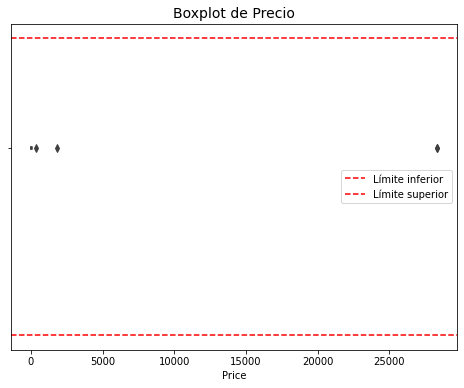

In [92]:
#Este gráfico muestra los cuartiles, los límites y los outliers identificados en el código.
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=df['Price'], ax=ax)
ax.set_title('Boxplot de Precio', fontsize=14)
ax.axhline(y=limite_inferior1, color='r', linestyle='--', label='Límite inferior')
ax.axhline(y=limite_superior1, color='r', linestyle='--', label='Límite superior')
ax.legend()
plt.show()

In [63]:
df = df1

# Ordenar los valores de la columna 'col1'
df1 = df1.sort_values('high')

Q1 = df1['high'].quantile(0.25)
Q3 = df1['high'].quantile(0.75)

# Calcular el rango intercuartil
IQR = Q3 - Q1

# Definir los límites del rango aceptable
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores que están fuera del rango aceptable
outliers = df1[(df1['high'] < limite_inferior) | (df1['high'] > limite_superior)]

# Calcular la desviación estándar
desviacion_estandar = df1['high'].std()

# Identificar los valores que están a más de dos desviaciones estándar de la media
outliers_sd = df1[(df1['high'] < df1['high'].mean() - 2*desviacion_estandar) | (df1['high'] > df['high'].mean() + 2*desviacion_estandar)]

In [64]:
print('Limite inferior: ' , limite_inferior)

print('Limite superior: ' , limite_superior)

print('Outliers: ')   
print(outliers)

print('DS: ' , desviacion_estandar)

print('outliers DS: ')       
print(outliers_sd)

Limite inferior:  -27277.795
Limite superior:  66455.44499999999
Outliers: 
                open      high       low     close  volume
time                                                      
2021-10-21  66021.02  66645.73  62076.16  62283.96     NaN
2021-10-20  64283.97  66980.66  63543.70  66021.02     NaN
2021-11-08  63302.78  67755.46  63302.78  67549.14     NaN
2021-11-09  67549.14  68514.26  66312.42  66939.24     NaN
2021-11-10  66939.24  68978.64  63196.25  64926.06     NaN
DS:  16876.611901109834
outliers DS: 
                open      high       low     close  volume
time                                                      
2021-04-26  49120.97  54389.71  48843.41  54062.29     NaN
2021-03-09  52405.02  54933.93  51888.98  54928.70     NaN
2021-03-26  51336.09  55083.90  51275.54  55055.43     NaN
2021-04-29  54877.94  55217.24  52399.42  53581.58     NaN
2021-11-27  53788.22  55316.65  53668.95  54805.03     NaN
...              ...       ...       ...       ...     ...
2

In [52]:
df = df2

# Ordenar los valores de la columna 'col1'
df2 = df2.sort_values('Precio USD')

Q1 = df['Precio USD'].quantile(0.25)
Q3 = df['Precio USD'].quantile(0.75)

# Calcular el rango intercuartil
IQR = Q3 - Q1

# Definir los límites del rango aceptable
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores que están fuera del rango aceptable
outliers = df[(df['Precio USD'] < limite_inferior) | (df['Precio USD'] > limite_superior)]

# Calcular la desviación estándar
desviacion_estandar = df['Precio USD'].std()

# Identificar los valores que están a más de dos desviaciones estándar de la media
outliers_sd = df[(df['Precio USD'] < df['Precio USD'].mean() - 2*desviacion_estandar) | (df['Precio USD'] > df['Precio USD'].mean() + 2*desviacion_estandar)]

In [53]:
print('Limite inferior: ' , limite_inferior)

print('Limite superior: ' , limite_superior)

print('Outliers: ')   
print(outliers)

print('DS: ' , desviacion_estandar)

print('outliers DS: ')       
print(outliers_sd)

Limite inferior:  -377.2716010934472
Limite superior:  630.3357322269749
Outliers: 
     Nombre Símbolo    Precio USD  Capitalización de mercado   Volumen 24h
1  Ethereum     ETH   1818.002846               2.224760e+11  1.094674e+10
0   Bitcoin     BTC  28332.969349               5.475739e+11  2.389967e+10
DS:  8901.352574565473
outliers DS: 
    Nombre Símbolo    Precio USD  Capitalización de mercado   Volumen 24h
0  Bitcoin     BTC  28332.969349               5.475739e+11  2.389967e+10


Se calcula el primer cuartil (Q1) y el tercer cuartil (Q3) de los datos de precios en dólares utilizando la función quantile() de pandas. Estos valores se utilizan para calcular el rango intercuartil (IQR) en el siguiente paso.
Se calcula el rango intercuartil (IQR) como la diferencia entre Q3 y Q1.
Se definen los límites del rango aceptable como Q1 - 1.5 * IQR para el valor mínimo y Q3 + 1.5 * IQR para el valor máximo. Los valores que se encuentran fuera de estos límites se consideran outliers y se identifican en el siguiente paso.
Se identifican los valores que están fuera del rango aceptable utilizando la función [(df['Precio USD'] < limite_inferior) | (df['Precio USD'] > limite_superior)]. Estos valores se almacenan en la variable outliers.
Se calcula la desviación estándar de los datos de precios en dólares utilizando la función std() de pandas.
Se identifican los valores que están a más de dos desviaciones estándar de la media utilizando la función [(df['Precio USD'] < df['Precio USD'].mean() - 2*desviacion_estandar) | (df['Precio USD'] > df['Precio USD'].mean() + 2*desviacion_estandar)]. Estos valores se almacenan en la variable outliers_sd

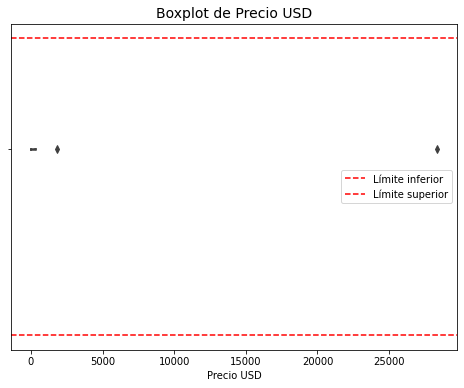

In [54]:
#Este gráfico muestra los cuartiles, los límites y los outliers identificados en el código.
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=df['Precio USD'], ax=ax)
ax.set_title('Boxplot de Precio USD', fontsize=14)
ax.axhline(y=limite_inferior, color='r', linestyle='--', label='Límite inferior')
ax.axhline(y=limite_superior, color='r', linestyle='--', label='Límite superior')
ax.legend()
plt.show()

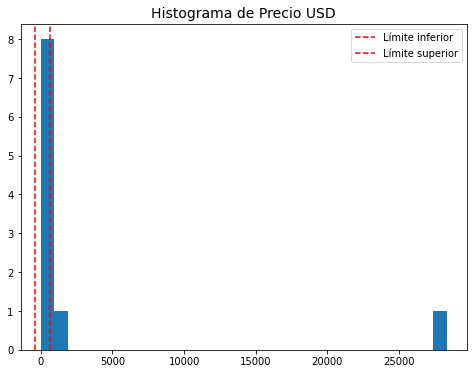

In [55]:
#Este gráfico muestra la frecuencia de los valores de Precio USD y los límites definidos.
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df['Precio USD'], bins=30)
ax.set_title('Histograma de Precio USD', fontsize=14)
ax.axvline(x=limite_inferior, color='r', linestyle='--', label='Límite inferior')
ax.axvline(x=limite_superior, color='r', linestyle='--', label='Límite superior')
ax.legend()
plt.show()

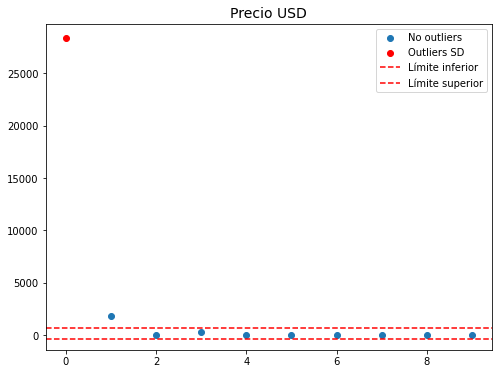

In [56]:
#Este gráfico muestra los valores de Precio USD que son outliers y los que no lo son, y los límites definidos.
outliers_sd = df[(df['Precio USD'] < df['Precio USD'].mean() - 2*desviacion_estandar) | (df['Precio USD'] > df['Precio USD'].mean() + 2*desviacion_estandar)]
no_outliers = df[(df['Precio USD'] >= df['Precio USD'].mean() - 2*desviacion_estandar) & (df['Precio USD'] <= df['Precio USD'].mean() + 2*desviacion_estandar)]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(no_outliers.index, no_outliers['Precio USD'], label='No outliers')
ax.scatter(outliers_sd.index, outliers_sd['Precio USD'], label='Outliers SD', color='r')
ax.axhline(y=limite_inferior, color='r', linestyle='--', label='Límite inferior')
ax.axhline(y=limite_superior, color='r', linestyle='--', label='Límite superior')
ax.set_title('Precio USD', fontsize=14)
ax.legend()
plt.show()

<function seaborn.distributions.displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)>

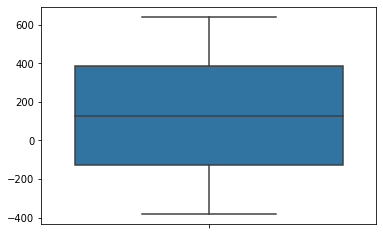

In [57]:
# Datos del boxplot
lim_inf = -383.68754289735335
lim_sup = 640.9014673408215

# Crear la figura del boxplot
fig = sns.boxplot(y=[lim_inf, lim_sup])

# Mostrar el gráfico
sns.displot
